# KPMG AU Virtual Internship

## Background Information

Sprocket Central Pty Ltd, a medium-sized company specializing in bicycles and cycling accessories, has reached out to Tony Smith, a Partner in KPMG's Lighthouse & Innovation Team. Sprocket Central Pty Ltd is eager to explore KPMG's capabilities within its Analytics, Information & Modeling team.

During their conversation, Smith elaborates on KPMG's proficiency in this domain (additional details are available here). Specifically, he emphasizes how the team can adeptly analyze data sets to facilitate the growth of Sprocket Central Pty Ltd.

Sprocket Central Pty Ltd's primary requirement is assistance with their customer and transaction data. They possess an extensive dataset related to their customers, but their team is uncertain about how to effectively analyze it to enhance their marketing strategy.

However, to support this analysis, you consult with the Associate Director for some insights, and she advises, "The significance of optimizing the quality of customer datasets should not be underestimated. The higher the quality of the dataset, the greater the potential to leverage it for driving company growth."

The client provided KPMG with 3 datasets:
- Customer Demographic 
- Customer Addresses
- Transactions data in the past 3 months

## Task 2
For context, Sprocket Central Pty Ltd is a long-standing KPMG client whom specialises in high-quality bikes and accessible cycling accessories to riders. Their marketing team is looking to boost business by analysing their existing customer dataset to determine customer trends and behaviour. 

Using the existing 3 datasets (**Customer demographic**, **customer address** and **transactions**) as a labelled dataset, suggestions have been provided regarding the selection of new customers from this group of 1000, with the aim of maximizing value for the organization.

Steps taken:
1. RFM analysis were conducted on the customers with the **Transaction** dataset. Details on RFM analysis can be found [here](https://ploiitubsamon.medium.com/rfm-analysis-for-customer-segmentation-with-power-bi-5d2f5bd62038)
2. The customer was categorized into the segment based on their RFM scores.
3. Only "Champions", "Loyal" and "Potential Loyalist" are categorised as the targetted customers. "Potential Loyalist" customers was included as they might show behaviors that indicate a propensity to become long-term customers.
4. A binary variable was introduced and it assigned a value of 1 to customers categorized as "Champions", "Loyal" or "Potential Loyal," while assigning a value of 0 to those falling under other segments.
5. Classificatin Model Development 

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1 Load Dataset

In [2]:
Transactions = pd.read_csv('assets/Transactions.csv', parse_dates = ['transaction_date'])
CustomerAddresses = pd.read_csv('assets/CustomerAddresses.csv')
CustomerDemographics = pd.read_csv('assets/CustomerDemographics.csv')

## 2 RFM Analysis

In [3]:
last_transaction_date = Transactions['transaction_date'].max()
last_transaction_date

Timestamp('2017-12-30 00:00:00')

### 2-1 Calculate Customer's RFM score

In [4]:
customer_by_rfm_score = Transactions.groupby('customer_id').agg(
    last_transaction_date=('transaction_date', 'max'),
    frequency=('transaction_id', 'count'),
    monetary=('list_price', 'sum')).reset_index()
customer_by_rfm_score.head()

,customer_id,last_transaction_date,frequency,monetary
0,1,2017-12-23,11,9084.45
1,2,2017-08-24,3,4149.07
2,3,2017-09-19,8,9888.23
3,4,2017-06-18,2,1047.72
4,5,2017-12-14,6,5903.20


In [5]:
customer_by_rfm_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id            3493 non-null   int64         
 1   last_transaction_date  3493 non-null   datetime64[ns]
 2   frequency              3493 non-null   int64         
 3   monetary               3493 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 109.3 KB


In [6]:
customer_by_rfm_score['recency'] = last_transaction_date - customer_by_rfm_score['last_transaction_date']

In [7]:
def calculate_score(value):
    percentile_20 = np.percentile(value, 20)
    percentile_40 = np.percentile(value, 40)
    percentile_60 = np.percentile(value, 60)
    percentile_80 = np.percentile(value, 80)

    val_scores = []
    for val in value:
        if val <= percentile_20:
            val_scores.append("1")
        elif val <= percentile_40:
            val_scores.append("2")
        elif val <= percentile_60:
            val_scores.append("3")
        elif val <= percentile_80:
            val_scores.append("4")
        else:
            val_scores.append("5")
    
    return val_scores

In [8]:
def calculate_r_score(value):
    percentile_20 = np.percentile(value, 20)
    percentile_40 = np.percentile(value, 40)
    percentile_60 = np.percentile(value, 60)
    percentile_80 = np.percentile(value, 80)

    val_scores = []
    for val in value:
        if val <= percentile_20:
            val_scores.append("5")
        elif val <= percentile_40:
            val_scores.append("4")
        elif val <= percentile_60:
            val_scores.append("3")
        elif val <= percentile_80:
            val_scores.append("2")
        else:
            val_scores.append("1")
    
    return val_scores

In [9]:
customer_by_rfm_score['R Score'] = calculate_r_score(customer_by_rfm_score['recency'])
customer_by_rfm_score['F Score'] = calculate_score(customer_by_rfm_score['frequency'])
customer_by_rfm_score['M Score'] = calculate_score(customer_by_rfm_score['monetary'])

In [10]:
customer_by_rfm_score['RFM Score'] = customer_by_rfm_score['R Score'].astype('str')+\
customer_by_rfm_score['F Score'].astype('str')+\
customer_by_rfm_score['M Score'].astype('str')

In [11]:
customer_by_rfm_score.head()

,customer_id,last_transaction_date,frequency,monetary,recency,R Score,F Score,M Score,RFM Score
0,1,2017-12-23,11,9084.45,7 days,5,5,5,555
1,2,2017-08-24,3,4149.07,128 days,1,1,2,112
2,3,2017-09-19,8,9888.23,102 days,1,4,5,145
3,4,2017-06-18,2,1047.72,195 days,1,1,1,111
4,5,2017-12-14,6,5903.20,16 days,4,3,3,433


### 2-2 Load RFM score

The customer was categorized into the segment based on their RFM scores.

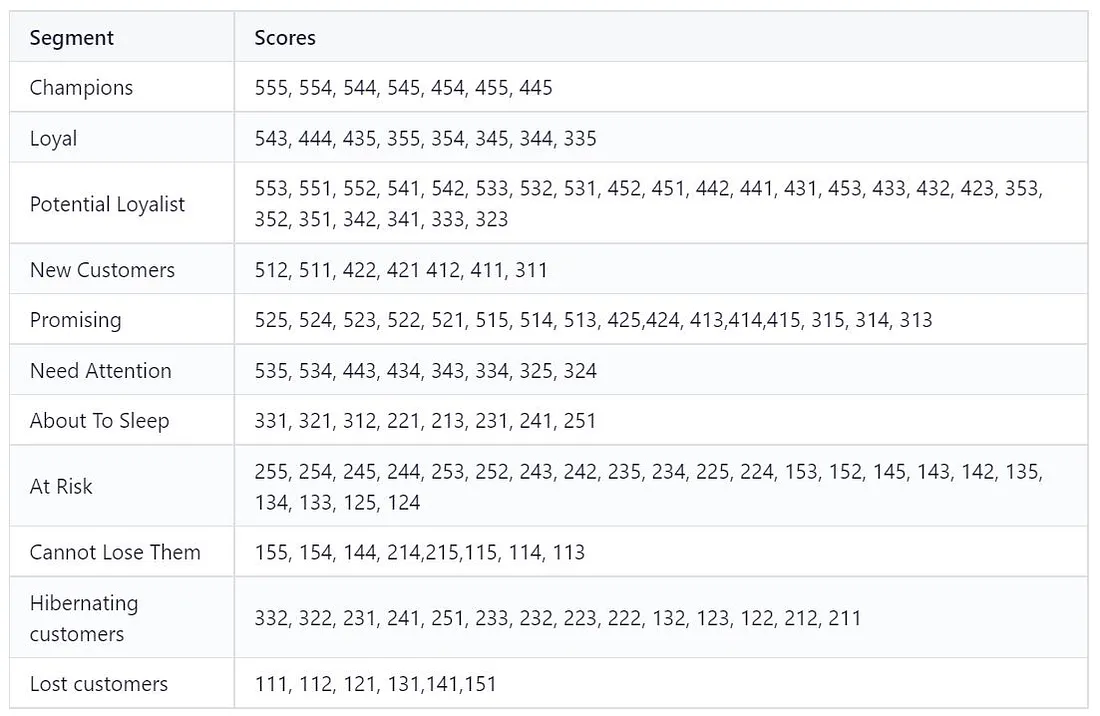

In [12]:
rfm_score = pd.read_excel('assets/RFM scores.xlsx')

In [13]:
rfm_score['Segment'].unique()

array(['Champions', 'Loyal', 'Potential Loyalist', 'New Customers',
       'Promising', 'Need Attention', 'About To Sleep', 'At Risk',
       'Cannot Lose Them', 'Hibernating customers', 'Lost customers'],
      dtype=object)

In [14]:
rfm_score

,Segment,Scores
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 231, 241, 251, 233, 232, 223, 222, 1..."


In [15]:
rfm_score = rfm_score['Scores'].str.split(',').explode().str.split(' ').explode().reset_index()\
.merge(rfm_score.reset_index()[['index','Segment']], on = 'index')

In [16]:
rfm_score = rfm_score[rfm_score['Scores'] !='']

In [17]:
rfm_score = rfm_score.drop_duplicates(subset='Scores')

In [18]:
rfm_score.head()

,index,Scores,Segment
0,0,555,Champions
2,0,554,Champions
4,0,544,Champions
6,0,545,Champions
8,0,454,Champions


### 2-3 Customer Segmentation

In [19]:
RFM = customer_by_rfm_score.merge(rfm_score, left_on = 'RFM Score', right_on='Scores')

In [20]:
RFM.head()

,customer_id,last_transaction_date,frequency,monetary,recency,R Score,F Score,M Score,RFM Score,index,Scores,Segment
0,1,2017-12-23,11,9084.45,7 days,5,5,5,555,0,555,Champions
1,25,2017-12-25,12,9996.33,5 days,5,5,5,555,0,555,Champions
2,37,2017-12-23,9,11291.71,7 days,5,5,5,555,0,555,Champions
3,89,2017-12-26,9,12741.44,4 days,5,5,5,555,0,555,Champions
4,109,2017-12-22,10,10661.51,8 days,5,5,5,555,0,555,Champions


In [21]:
RFM['Segment'].value_counts()

Hibernating customers    563
Champions                463
New Customers            426
At Risk                  411
Loyal                    377
Lost customers           365
Potential Loyalist       277
Need Attention           216
Promising                195
About To Sleep           114
Cannot Lose Them          86
Name: Segment, dtype: int64

### 2-4 Customer Demographics

In [22]:
demographic = CustomerDemographics.merge(CustomerAddresses, on=["customer_id"])

In [23]:
demographic.head()

,Unnamed: 0_x,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,Unnamed: 0_y,address,postcode,state,country,property_valuation
0,0,1,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11,64,0,060 Morning Avenue,2016,NSW,Australia,10
1,1,2,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,37,1,6 Meadow Vale Court,2153,NSW,Australia,10
2,3,4,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7,56,2,0 Holy Cross Court,4211,QLD,Australia,9
3,4,5,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8,40,3,17979 Del Mar Point,2448,NSW,Australia,4
4,5,6,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13,51,4,9 Oakridge Court,3216,VIC,Australia,9


### 2-5 High value lead

In [24]:
high_lead_val = ["Champions","Loyal", "Potential Loyalist"]

RFM['high_val_lead'] = RFM['Segment'].apply(lambda x: 1 if x in high_lead_val else 0)

In [25]:
RFM.head()

,customer_id,last_transaction_date,frequency,monetary,recency,R Score,F Score,M Score,RFM Score,index,Scores,Segment,high_val_lead
0,1,2017-12-23,11,9084.45,7 days,5,5,5,555,0,555,Champions,1
1,25,2017-12-25,12,9996.33,5 days,5,5,5,555,0,555,Champions,1
2,37,2017-12-23,9,11291.71,7 days,5,5,5,555,0,555,Champions,1
3,89,2017-12-26,9,12741.44,4 days,5,5,5,555,0,555,Champions,1
4,109,2017-12-22,10,10661.51,8 days,5,5,5,555,0,555,Champions,1


In [26]:
RFM['high_val_lead'].value_counts()

0    2376
1    1117
Name: high_val_lead, dtype: int64

### 2-6 Merge Customer Demographics with Segment

In [27]:
RFM = RFM[['customer_id', 'high_val_lead']]

In [28]:
RFM_demographic = RFM.merge(demographic, on = ["customer_id"])

In [29]:
RFM_demographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3412 entries, 0 to 3411
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          3412 non-null   int64 
 1   high_val_lead                        3412 non-null   int64 
 2   Unnamed: 0_x                         3412 non-null   int64 
 3   gender                               3412 non-null   object
 4   past_3_years_bike_related_purchases  3412 non-null   int64 
 5   DOB                                  3412 non-null   object
 6   job_title                            2997 non-null   object
 7   job_industry_category                2852 non-null   object
 8   wealth_segment                       3412 non-null   object
 9   deceased_indicator                   3412 non-null   object
 10  owns_car                             3412 non-null   object
 11  tenure                               3412 n

### 2-7 Data Preparation 

In [30]:
RFM_demographic = RFM_demographic[['past_3_years_bike_related_purchases', 'tenure', 'property_valuation' , 'age', \
                                   'gender', 'wealth_segment', 'owns_car', 'state', 'high_val_lead']]

In [31]:
RFM_demographic.head()

,past_3_years_bike_related_purchases,tenure,property_valuation,age,gender,wealth_segment,owns_car,state,high_val_lead
0,93,11,10,64,Female,Mass Customer,Yes,NSW,1
1,72,21,3,41,Male,Mass Customer,Yes,QLD,1
2,46,16,1,32,Female,High Net Worth,No,QLD,1
3,74,14,11,50,Male,Mass Customer,Yes,NSW,1
4,16,4,11,39,Male,Affluent Customer,Yes,NSW,1


In [32]:
features = RFM_demographic.drop(axis=1, columns=['high_val_lead'])
y = RFM_demographic['high_val_lead']

In [33]:
features = pd.get_dummies(features, drop_first=True)
features.head()

,past_3_years_bike_related_purchases,tenure,property_valuation,age,gender_Male,gender_U,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_Yes,state_QLD,state_VIC
0,93,11,10,64,0,0,0,1,1,0,0
1,72,21,3,41,1,0,0,1,1,1,0
2,46,16,1,32,0,0,1,0,0,1,0
3,74,14,11,50,1,0,0,1,1,0,0
4,16,4,11,39,1,0,0,0,1,0,0


In [34]:
features_name = features.columns.to_list()

In [35]:
features_cat = features.iloc[:,4:]
features_num = features.iloc[:,:4]

In [36]:
X_num = features_num.values
X_cat = features_cat.values

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [38]:
X_num = scaler.fit_transform(X_num)
X = np.concatenate((X_cat, X_num), axis=1)

## 3 Model Development
### 3-1 Train Validation Test Split

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=28)

### 3-2 Define Functions

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def scores(y_val, y_pred):
    cm = confusion_matrix(y_val, y_pred)
    tn, fp, fn, tp = cm.ravel()
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0  # Avoid division by zero
    f1 = f1_score(y_val, y_pred)

    # Print the calculated metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall (Sensitivity):", recall)
    print("Specificity:", specificity)
    print("F1-Score:", f1)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

def confusion_matrix_(y_val,y_pred):
    confusion_matrix_ = confusion_matrix(y_val,y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_, display_labels = [False, True])
    cm_display.plot()
    plt.show()

### 3-3 Model Selection

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [43]:
# Initialize the models
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000,random_state=28),
    'GaussianNB': GaussianNB(),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=28),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(random_state=28),
    'RandomForestClassifier': RandomForestClassifier(random_state=28),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=28),
    'XGBClassifier': XGBClassifier(random_state=28)
}

In [44]:
# Dictionary to store results
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'Specificity': [],
    'F1 Score': [],
    'fp':[],
    'tp':[],
    'tn':[],
    'fn':[],
}

In [45]:
for model_name, model in models.items():
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=28)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
            
        cm = confusion_matrix(y_val, y_pred)
        tn, fp, fn, tp = cm.ravel()
        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
        specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
        f1 = f1_score(y_val, y_pred)
            
        results['Model'].append(model_name)
        results['Accuracy'].append(accuracy)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['Specificity'].append(specificity)
        results['F1 Score'].append(f1)
        results['fp'].append(fp)
        results['tp'].append(tp)
        results['tn'].append(tn)
        results['fn'].append(fn)


# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defin

In [46]:
# Define a custom function to set the header background color
def header_colors(s):
    return [f'background-color: {your_color}' for val in s]


# Define a custom styling function to highlight 0 values
def highlight_zero(value):
    if value == 0:
        return 'background-color: red'
    else:
        return ''

# Apply the styling function to the specified columns
styled_df = results_df.sort_values(by=['F1 Score'], ascending  = False).style.set_table_styles([{'selector': 'th',
                                        'props': [('background-color', 'darkblue'), ('color', 'white')]}]).applymap(highlight_zero, subset=['fp', 'tp', 'tn', 'fn'])

# Display the styled DataFrame
styled_df

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,fp,tp,tn,fn
1,GaussianNB,0.303075,0.303075,1.000000,0.000000,0.465169,476,207,0,0
2,DecisionTreeClassifier,0.576867,0.333333,0.396135,0.655462,0.362031,164,82,312,125
3,KNeighborsClassifier,0.617862,0.309859,0.212560,0.794118,0.252149,98,44,378,163
7,XGBClassifier,0.617862,0.278689,0.164251,0.815126,0.206687,88,34,388,173
5,RandomForestClassifier,0.658858,0.303030,0.096618,0.903361,0.146520,46,20,430,187
6,GradientBoostingClassifier,0.679356,0.312500,0.048309,0.953782,0.083682,22,10,454,197
0,LogisticRegression,0.696925,0.000000,0.000000,1.000000,0.000000,0,0,476,207
4,SVC,0.696925,0.000000,0.000000,1.000000,0.000000,0,0,476,207


With the primary goal of identifying valuable leads, the key performance metric to evaluate the current model is the **F1 score** along with the count of false positives. Although the Gaussian Naive Bayes model achieves a higher F1 score, it exhibits a relatively high number of false positives. In contrast, the **DecisionTreeClassifier** yields an F1 score of 0.36 with 125 false positives, is deemed acceptable at this stage. Thus, DecisionTreeClassifier is used to predict the New Customer List provided. 

In [47]:
dt_classifier = DecisionTreeClassifier(random_state=28)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

In [48]:
scores(y_val, y_pred)

Accuracy: 0.5300146412884333
Precision: 0.28888888888888886
Recall (Sensitivity): 0.37681159420289856
Specificity: 0.5966386554621849
F1-Score: 0.3270440251572327


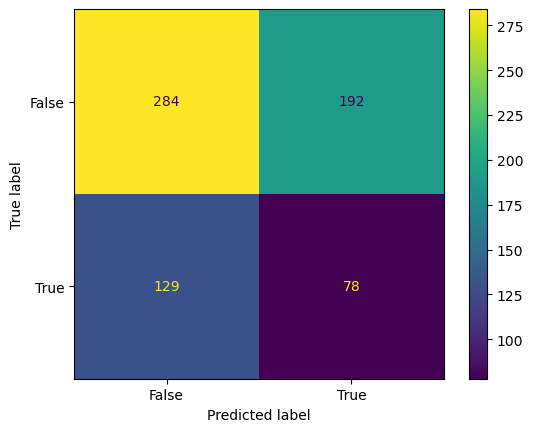

In [49]:
confusion_matrix_(y_val,y_pred)

<font face='Comfortaa'><h2> 8 Predict New Customer List

In [50]:
kpmg = "https://cdn-assets.theforage.com/vinternship_modules/kpmg_data_analytics/KPMG_VI_New_raw_data_update_final.xlsx"
NewCustomerList = pd.read_excel(kpmg, sheet_name = 'NewCustomerList', header = 1)
NewCustomerList.head()

C:\Users\Chieng Bao Qing\AppData\Local\Temp\ipykernel_19168\2884894275.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  NewCustomerList = pd.read_excel(kpmg, sheet_name = 'NewCustomerList', header = 1)


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [51]:
NewCustomerList = NewCustomerList.loc[:, 'gender':'property_valuation']

In [52]:
NewCustomerList = NewCustomerList.drop(axis=1, columns=['job_title', 'job_industry_category','deceased_indicator', 'address', 'postcode', 'country'])

In [53]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   gender                               1000 non-null   object        
 1   past_3_years_bike_related_purchases  1000 non-null   int64         
 2   DOB                                  983 non-null    datetime64[ns]
 3   wealth_segment                       1000 non-null   object        
 4   owns_car                             1000 non-null   object        
 5   tenure                               1000 non-null   int64         
 6   state                                1000 non-null   object        
 7   property_valuation                   1000 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 62.6+ KB


In [54]:
#category
NewCustomerList['gender'] = NewCustomerList['gender'].astype('category')
NewCustomerList['wealth_segment'] = NewCustomerList['wealth_segment'].astype('category')
NewCustomerList['owns_car'] = NewCustomerList['owns_car'].astype('category')
NewCustomerList['state'] = NewCustomerList['state'].astype('category')

#int
NewCustomerList['past_3_years_bike_related_purchases'] = NewCustomerList['past_3_years_bike_related_purchases'].astype('int')
NewCustomerList['tenure'] = NewCustomerList['tenure'].astype('int')
NewCustomerList['property_valuation'] = NewCustomerList['property_valuation'].astype('int')

#date
NewCustomerList['DOB'] = pd.to_datetime(NewCustomerList['DOB'])


In [55]:
NewCustomerList['age'] = last_transaction_date.year - NewCustomerList['DOB'].dt.year

In [56]:
NewCustomerList['age'].median()

45.0

In [57]:
NewCustomerList['age'] = NewCustomerList['age'].fillna(45.0)

In [58]:
NewCustomerList = NewCustomerList.drop(axis=1, columns=['DOB'])

In [59]:
NewCustomerList = NewCustomerList[['past_3_years_bike_related_purchases', 'tenure', 'property_valuation' , 'age', \
                                   'gender', 'wealth_segment', 'owns_car', 'state']]

In [60]:
features_new = pd.get_dummies(NewCustomerList, drop_first = True)

In [61]:
features_cat = features_new.iloc[:, 4:]
features_num = features_new.iloc[:, :4]

In [62]:
X_num_new = features_num.values
X_cat_new = features_cat.values

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [64]:
X_num_new = scaler.fit_transform(X_num_new)
X_new = np.concatenate((X_num_new, X_cat_new), axis = 1)

In [65]:
y_pred = dt_classifier.predict(X_new)

In [66]:
NewCustomerList['y_pred'] = y_pred

In [67]:
NewCustomerList['y_pred'].value_counts()

0    743
1    257
Name: y_pred, dtype: int64

In [68]:
NewCustomerList.head()

,past_3_years_bike_related_purchases,tenure,property_valuation,age,gender,wealth_segment,owns_car,state,y_pred
0,86,14,6,60.0,Male,Mass Customer,Yes,QLD,0
1,69,16,11,47.0,Male,Mass Customer,No,NSW,0
2,10,10,5,43.0,Female,Affluent Customer,No,VIC,1
3,64,5,1,38.0,Female,Affluent Customer,Yes,QLD,0
4,34,19,9,52.0,Female,Affluent Customer,No,NSW,0


In [69]:
NewCustomerList.to_csv('assets/predicted_customer.csv')

## Deliverables: 
A classification model has been developed to predict high-value leads from the provided list of new customer.
### Key Takeaways: 
- Out of the 1000 customers, the model predicts 257 as high-value sales leads.
- The current model's performance metrics are as follows:
    - Accuracy: 0.53
    - Precision: 0.28
    - Recall (Sensitivity): 0.37
    - Specificity: 0.59
    - F1-Score: 0.32
- The current model encounters difficulties in correctly identifying both true positives and true negatives.